In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [46]:
import torch
import torch.nn.functional as F
from torch import nn
from torch import optim
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [8]:
device=torch.device('cuda')
device 

device(type='cuda')

In [82]:
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])
train=datasets.MNIST(root="data",train=True,download=True,transform=transform)
test=datasets.MNIST(root="data",train=False,download=True,transform=transform)
train_loader = DataLoader(train, batch_size=32, shuffle=True)
test_loader = DataLoader(test, batch_size=32)

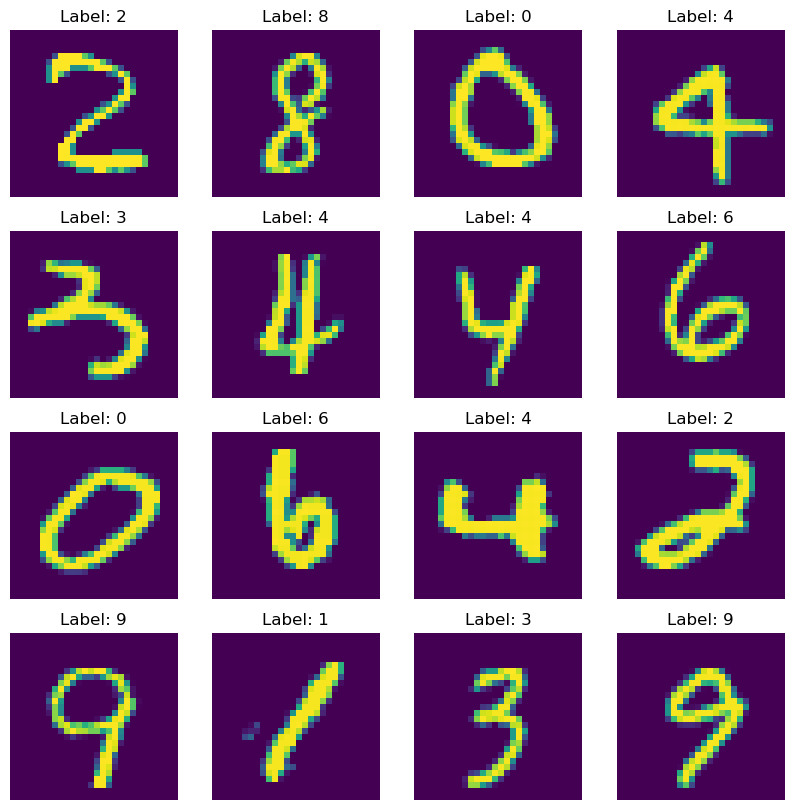

In [83]:
# Get a batch of data from the train_loader
dataiter = next(iter(train_loader))
images, labels = dataiter

# Plot multiple images from the batch
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    # Select a single image from the batch
    image = images[i]

    # Reshape the image to (height, width, num_channels)
    image = np.transpose(image, (1, 2, 0))

    # Display the image and label
    ax.imshow(image)
    ax.set_title(f"Label: {labels[i]}")
    ax.axis("off")

plt.show()

In [84]:
for X, y in train_loader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([32, 1, 28, 28])
Shape of y: torch.Size([32]) torch.int64


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation=F.relu
        self.fc1=nn.Linear(28*28,512)
        self.fc2=nn.Linear(512,128)
        self.fc3=nn.Linear(128,10)
    def forward(self,x):
        x=torch.flatten(x,1)
        x=self.activation( self.fc1(x))
        x=self.activation( self.fc2(x))
        x=F.softmax(self.fc3(x))
        return x
net=Net()    
net.to(device)

In [96]:
# Choose an optimizer
optimizer = optim.Adam(net.parameters(),lr=0.001,weight_decay=0.0005)

# Choose a loss function
criterion = nn.CrossEntropyLoss()

In [101]:
num_epoch=150
train_loss_history=list()
test_loss_history=list()
for epoch in range(num_epoch):
    net.train()
    train_loss=0
    train_correct=0
    for i, data in enumerate(train_loader):    
        inputs, labels=data
        # Pass to GPU if available.
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        output=net(inputs)
        loss=criterion(output,labels)
        loss.backward()
        optimizer.step()
        _,preds=torch.max(output.data,1)
        train_correct+=(preds==labels).sum().item()
        train_loss+=loss.item()
    if (i+1) % 25 == 0:     
            print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
    train_loss_history.append(train_loss/len(train_loader))


    test_loss = 0.0
    test_correct = 0
    net.eval()
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = net(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs.data, 1)
        test_correct += (preds == labels).sum().item()
        test_loss += loss.item()
        
    if (i+1) % 25 == 0:     
            print(f'Epoch {epoch + 1} validation accuracy: {test_correct/len(test_loader):.2f}% test loss: {test_loss/len(test_loader):.5f}')
    test_loss_history.append(test_loss/len(test_loader))

/tmp/ipykernel_28/2058293199.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x=F.softmax( self.fc2(x))


Epoch 1 training accuracy: 30.73% training loss: 0.24188
Epoch 1 validation accuracy: 30.55% test loss: 0.27279
Epoch 2 training accuracy: 30.71% training loss: 0.24157
Epoch 2 validation accuracy: 30.52% test loss: 0.26475
Epoch 3 training accuracy: 30.73% training loss: 0.24086
Epoch 3 validation accuracy: 30.58% test loss: 0.26819
Epoch 4 training accuracy: 30.70% training loss: 0.24368
Epoch 4 validation accuracy: 30.45% test loss: 0.26511
Epoch 5 training accuracy: 30.74% training loss: 0.24260
Epoch 5 validation accuracy: 30.41% test loss: 0.26542
Epoch 6 training accuracy: 30.72% training loss: 0.24362
Epoch 6 validation accuracy: 30.32% test loss: 0.27415
Epoch 7 training accuracy: 30.70% training loss: 0.24385
Epoch 7 validation accuracy: 30.58% test loss: 0.25693
Epoch 8 training accuracy: 30.77% training loss: 0.23899
Epoch 8 validation accuracy: 30.60% test loss: 0.25136


KeyboardInterrupt: 

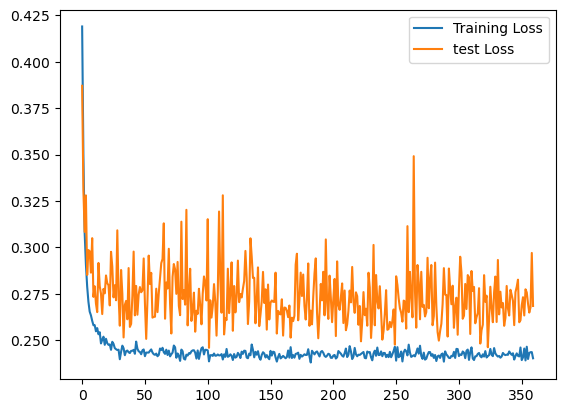

In [99]:
# Plot the training and validation loss history
plt.plot(train_loss_history, label="Training Loss")
plt.plot(test_loss_history, label="test Loss")
plt.legend()
plt.show()